## Cat or Dog
#### 1
[Cats And Dogs Classifier | Convolutional Neural Network with Python and Tensorflow (9 steps of Building)](https://medium.com/@harsathAI/cats-and-dogs-classifier-convolutional-neural-network-with-python-and-tensorflow-9-steps-of-6259c92802f3)  

https://github.com/harsathAI/Cats-Vs-Dogs-Image-Classifier/blob/master/Cats%20vs%20Dogs%20Classifier.ipynb  
#### 2
[Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)  
https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d  

#### dataset  
https://www.kaggle.com/c/dogs-vs-cats
    

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger
from keras import backend as K

from livelossplot import PlotLossesKeras

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/Users/weiyou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#install pacakage in jupyter notobook
# !pip3 install livelossplot 
# !pip3 install neptune-cli

In [3]:
# file to save
Training_logs_file = "training_logs.csv"
Model_summary_file = "model_summary.txt"
Test_file = "test_file.txt"
Model_file = "model.h5"

In [4]:
# Data file path
train_data_dir = 'data/train' # 1000*2
valid_data_dir = 'data/valid' # 400*2
test_data_dir = 'data/test'   # 50*2

# Hyper parameters
img_width, img_height = 150, 150 # demensions of our images
nb_train_samples = 2000
nb_valid_samples = 800 # number of sample in valid dataset
nb_test_samples = 100
epochs = 5
batch_size = 16

if K.image_data_format() == "channels_first": # to tell the format of the data
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [5]:
# build the model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(63, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) # output is one class either cat or dog
model.add(Activation('sigmoid')) #'softmax'

In [6]:
model.compile(loss='binary_crossentropy', #'categorical_crossentropy'
              optimizer=RMSprop(lr=0.0001), #'rmsprop' 'Adam'
              metrics=['accuracy'])

In [7]:
# save model summary
with open(Model_summary_file, "w") as f:
    model.summary(print_fn = lambda line: f.write(line + "\n"))

In [8]:
# data augmentation configuration
# ?
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# data generator/preparation
# ?
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,  #test don't need bach split
    class_mode='binary',
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [19]:
# print(valid_generator)
# print(test_generator)

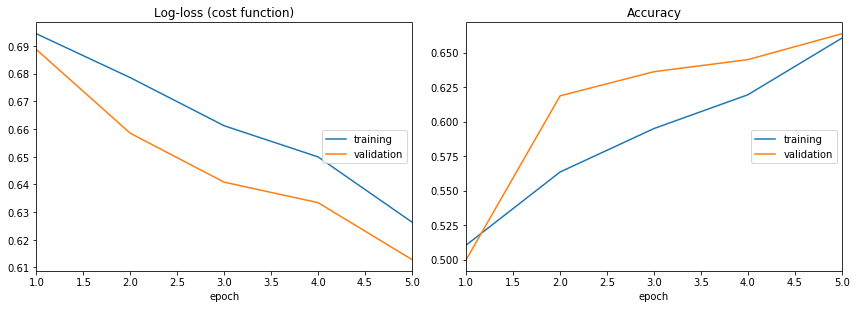

Log-loss (cost function):
training   (min:    0.626, max:    0.694, cur:    0.626)
validation (min:    0.613, max:    0.689, cur:    0.613)

Accuracy:
training   (min:    0.510, max:    0.660, cur:    0.660)
validation (min:    0.500, max:    0.664, cur:    0.664)


In [9]:
# Training
# when use generator, can use .fit_generator instead of .fit
# 使用 Python 生成器或 Sequence 实例逐批生成的数据，按批次训练模型。

history = model.fit_generator(
    train_generator,
    #steps_per_epoch = nb_train_samples // batch_size,
    steps_per_epoch = len(train_generator.filenames) // batch_size,
    epochs = epochs,
    validation_data = valid_generator,
    #validation_steps = nb_valid_samples // batch_size,
    validation_steps = len(valid_generator.filenames) // batch_size,
    callbacks = [PlotLossesKeras(), 
                 CSVLogger(Training_logs_file, append=False, separator=";")],
    verbose = 1)

model.save_weights(Model_file)#'first_try.h5') # save model weights
# save model
# model.save(MODEL_1)

In [25]:
# Testing
open(Test_file, "w")
probabilities = model.predict_generator(test_generator, len(test_generator.filenames))#
print(probabilities)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" + test_generator.filenames[index]
    img = mpimg.imread(image_path)
    print(index)
    print(probability[0])
    with open(Test_file, "a") as f:
        f.write(str(probability[0]) + " for：" + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()


[]


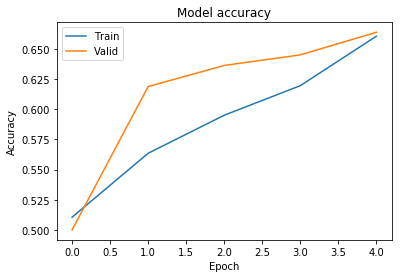

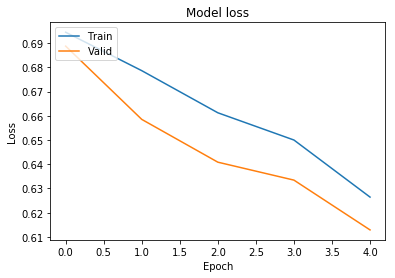

In [11]:
# Visulazation
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

# plot training & validation accuracy curves
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# plot training & validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [12]:
# from keras.preprocessing import image
# kitty = image.load_img('kitty.jpg', target_size=input_shape)
# print(type(kitty))
# plt.imshow(kitty)
# plt.show()

# kitty_ = image.img_to_array(kitty)
# print(type(kitty_))
# print(kitty_.shape)
# plt.imshow(kitty_)
# plt.show()

# model.predict(kitty_, batch_size=None, verbose=0, steps=None)